# [TITLE OF EXERCISE]

In this exercise, we'll move toward using RViz.RViz is a 3D visualizer that allows you to view sensor and state information. We use RViz to model our robots before we use actual hardware.

## Starting RViz

Starting RViz as a program is very simple. You can quite easily do it by running the following line of code. Before doing this make sure that roscore is running.

In [57]:
!rosrun rviz rviz

[ INFO] [1555328685.508861773]: rviz version 1.12.16
[ INFO] [1555328685.508982526]: compiled against Qt version 5.5.1
[ INFO] [1555328685.509001592]: compiled against OGRE version 1.9.0 (Ghadamon)
[ INFO] [1555328685.917175080]: Stereo is NOT SUPPORTED
[ INFO] [1555328685.917266011]: OpenGl version: 3 (GLSL 1.3).
0x1dd7620 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1278fb0) ): Attempt to set a screen on a child window.
0x1dd72a0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1278fb0) ): Attempt to set a screen on a child window.
0x1dcc650 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1278fb0) ): Attempt to set a screen on a child window.
0x1faaab0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1278fb0) ): Attempt to set a screen on a child window.
0x2065dd0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1278fb0) ): Attempt to set a screen on a child window.
0x2094700 void QWindowPr

A new window that looks like the following should have appeared. 

<img src="img/RViz1.jpg" alt="RViz1" style="width: 800px;"/>

You should notice that there appears to be an error in the toolbar on the left. 

It says: "No tf data.  Actual error: Fixed Frame [map] does not exist". Next we'll make sure that tf data is present and that we have a fixed fram onto which we can broadcast other information.


## tf Frames

If we wanted to find the difference between how object1 and object2 were moving, how would we do that? In ROS, we need functionality to be able to both refer to objects and compare their position, velocity, etc. The tf frames allow us to do this. How does the gripper move in relation to an arm? Compare the gripper tf frame with the arm tf frame. If we wanted to work on how a laser moves, it would be easiest to do so with relation to the laser, instead of trying to move whatever the laser is attached to. If we wanted the distance between two elements, we'd find the distance between their frames.

<img src="img/tfframes.png" alt="tf Frames" style="width: 400px;"/>


Additionally, tf maintains a heirachy between frames. tf maintains this heirarchy with a tree. In the above example, we can see the "world" frame. This frame is our background, and it is static throughout our simulation. Then we have the turtle1 frame, which presumably is for a turtlebot. This frame will move based on the movement of our turtle sim. We have another frame for a turtle, turle2. Notice in the example that an arrow does not run between turtle1 and turtle2, that is because these two frames do not have a dependency. Both are dependant on the world (parent) frame (all tf frames are either a parent or a child frame, or both). There is one final frame called "carrot1". This frame has a dependancy with "turtle2". This dependancy could be, for example, that carrot1's position is based on turtle2's position.

### Fixed Frame

The Fixed Frame provides a frame of reference for the visualizations done in RViz. Think of the classic physics problem of two cars driving toward each other. If one car is driving at 25m/s and the other car is moving at 35 m/s, then from a fixed point of reference, each car is moving at the speed they are moving. From the frame of reference of one of the cars, the car is not moving and the other car is moving at 60m/s.

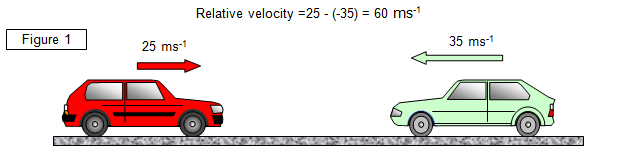

The Fixed Frame in RViz is similar to the frame of reference of the physics problem. In order for our simulations to make sense, we need a frame of reference. If our frame of reference was a robot's arm, the the arm would always be static and every other element, including the background, would be moving around it.  Most elements have a frame, the Fixed Frame in RViz is the tf frame that we select to be the frame of reference for our simulation.

So in RViz, whatever tf frame we set to be our Fixed Frame, that frame will be our frame of reference. So whatever (0,0,0) is for the tf frame set to be Fixed Frame is (0,0,0) defined in RViz. There's no absolute background, no universal origin point. There's only the differences between defined frames.



### Viewing tf data

We start by seeing what tf data is being published. Every fixed frame will output data, which we should be able to view. Run the following line of code in a terminal, it will listen for 5 seconds for any tf data, then create a tf tree and publish it to a .pdf file.




In [23]:
!rosrun tf view_frames

!evince frames.pdf

Listening to /tf for 5.000000 seconds
Done Listening
dot - graphviz version 2.38.0 (20140413.2041)

Detected dot version 2.38
frames.pdf generated


The resulting pdf file shows that there arent any active tf frames. As such, there's no tf data to listen to. Next well generate some tf data to listen to.

### Publishing a tf frame

There's a reletively simple command that can publish a tf frame relative to the "world". The command we want to run in the terminal is:


In [44]:
static_transform_publisher 5 0 0 0 0 0 1 world world1

SyntaxError: invalid syntax (<ipython-input-44-d772417de3cc>, line 1)

This command can also be run in the jupyter notebook below,

In [52]:
import subprocess
world1_tf_process=subprocess.Popen(["static_transform_publisher", "5", "0", "0", "0", "0", "0", "1", "world", "world1"])

Now if you rerun the command to listen to tf data, you should see a tf tree with two items, the world and world1. Additionally, you can relaunch RViz, and you will be able to set the Fixed Frame to either the world or world1

The static_transform_publisher command creates a child tf frame from a base tf frame. In this case, our child tf frame is world1 and the base tf frame is world. The first three numbered arguments are the x, y, z arguments in relation to our base tf frame. So world1 is shifted on the x-axis by five. The next four arguments are rotation data, so world1 is slightly rotated when compared to world. 

There's three important things to note about tf frames here,

* A tf frame must have a translation in order to exist. It's not possible to have a 0-translation, that just creates a child frame that's identical to the parent frame. tf does not allow this. However, a child frame could undo the translation its parent frame does and still be valid (for example, world1 shifts everything to x+1, world2 could shift everything to x-1 and thus world2 would be equivalent to world, however these are considered distinct tf frames).

* In a similar vein, every frame is either a parent frame, a child frame or both. A frame cannot exist without its connection to other frames. Again, there are no universal constants, only the relationships between tf frames.

* If tf is provided with conflicting transformations (e.g. world -> wolrd1 -> world2 does not equal world -> world2) then whichever transformation was called first will be the one that is active in the tf tree. The second translation will be ignored. 

Now that we understand tf frames, let's broadcast something to put in our frame.

## Publishing

We went over a little of publishing/subscribing in the last exercise. It is a critical idea in ROS, as it is how information is sent between different elements. In this part of the exercise, we're going to create several different publishers and subscribers.


### Publish a Marker

A Marker in RViz is just a shape. We can use them as placeholders to see if we're publishing something correctly. They are also great tools for learning about publishing and RViz.

#### What is a Marker?

A Marker in RViz is a stand-in object. It's a way for us to see if information is being published/subscribed correctly. Sending actual robot data might be very computationally expensive (especially if there is a lot of data to be sent). Additionally, the data being sent could have errors. One way to debug a publisher/subscriber and ensure this aspect is in working order is to use Markers. Markers are simple object. If we are having a problem with robot data not appearing, we can send a Marker. If the Marker is appearing, we know that the publisher/subscriber is working correctly, and the problem lies somewhere else.

When first learning about ROS, RViz, tf Frames, etc., Markers are a great way to practice and develop the skills necessary to move onto more complex tasks. The exercise after this one will relay on your understanding of the topics covered in this exercise, which is why we are covering them.

#### Coding a Marker

First, we need to define the Marker publisher, which we do below.

In [55]:
%%writefile mark.py
#!/usr/bin/env python

import rospy, roslib
import tf
from visualization_msgs.msg import Marker
import std_msgs.msg as stm
from multiprocessing import Process


def pub_mark():
    rospy.init_node("mark")
    
    while not rospy.is_shutdown():
        
        # Creates Marker object named marker
        marker = Marker()
        
        # Define marker parameters
        marker.header.frame_id = "/world1"
        marker.header.stamp = rospy.Time.now()
        marker.type = Marker.CUBE
        marker.action = Marker.ADD
        marker.scale.x = 1
        marker.scale.y = 1
        marker.scale.z = 1
        marker.id = 10
        marker.pose.position.x = 0;
        marker.pose.position.y = 0;
        marker.pose.position.z = 0;
        marker.pose.orientation.x = 0.0;
        marker.pose.orientation.y = 0.0;
        marker.pose.orientation.z = 0.0;
        marker.pose.orientation.w = 1.0;
        marker.color = stm.ColorRGBA(r=0.0, g=1.0, b=0.0, a=0.8)
        marker.lifetime.secs = 10
        
        #Create Publisher called 'process_test' of type Marker
        pub = rospy.Publisher("Otto_von_Vismark", Marker, queue_size=10)
        
        #Publish marker
        pub.publish(marker)

    
if __name__ == "__main__":
    pub_mark()




Overwriting mark.py


#### Explaination of the Code

First things first, the import statements. The two key ones to notice here are the Marker from visualization_msgs.msg and the std_msgs.msg. The Marker is a predefined object, which makes life easy for us. Instead of having to build this from scratch, we can just fill in the marker with out own information and then publish it. The std_msgs.msg contains many common formats. We're going to use it to set the color of our marker.

The next important line is

`marker = Marker()`

This creates a Marker object named "marker". We'll modify "marker" and eventually publish it. Marker is the outline that's defined in visualization_msgs.msg, while marker is the object we modify ourselves.

The next 16 lines are defining different parameters of our marker. These are self descriptive. A key one to notice is: `marker.header.frame_id = "/world1"`

This line sets the frame id that we want this markers position to be determined by. For example, if we set the frame_id to be "world", and "world" is our Fixed Frame, then the position of the Marker will be (0,0,0) in RViz. Whereas if we set the frame_id to be "world2" which compared to "world" (our Fixed Frame) is shifted +10 on the x-axis, then our marker will be at position (10,0,0) in RViz. 

A key thing to notice is that if the Fixed Frame isn't related to the frame_id, then the marker will not appear. For example, if we set the frame_id to "earth", but there's no translation between "world" (our Fixed Frame) and "earth", then our marker will not appear. This is because RViz doesn't know where the marker should go relative to the fixed frame.

The next key line is `pub = rospy.Publisher("Otto_von_Vismark", Marker, queue_size=10)`. This creates the publisher that will communicate our Marker to RViz. The "Otto_von_Vismark" is the name of the ROS Topic we are publishing to, which is important because we need to know the name of this Topic in order to subscribe to it. This Topic name can be anything, as long as it's not the name of some other Topic. You'll notice that this line is very similar to the same line in exercise0


The next argument is Marker, which merely states the type of information being sent over that Topic.

Finally we publish the marker with the Publisher.

#### Running the Publisher

The very first line of code in the Jupyter Notebook is `%%writefile mark.py`. This just causes everything written after it to be written to a file "mark.py". Run the code above to create "mark.py". After that's run, we can run our publisher in the Jupyter Notebook. First, make sure roscore is running. Then make sure our static tf frame translation between "world" and "world1" is running, without it there won't be any tf frames to reference. Then run the code below. Finally, run RViz.

<div class="alert alert-block alert-warning">
<b>Note:</b> If you run RViz first, nothing will work. Due to the way Jupyter Notebooks schedule processes, the commands for the tf frame translation and the publisher will wait until after RViz is finished running (because unlike the tf frame translation and publisher, RViz is not running the background).
</div>



In [56]:
import subprocess

mark_publisher_process=subprocess.Popen(["python", "mark.py"])

The window we saw at the beginning of this exercise should have appeared.

The first thing we need to do is set the Fixed Frame. We currently have two active tf frames, "world" and "world1". First, we need to pick one to be our Fixed Frame. Because we set the frame_id of our marker to be "world1", let's pick that to be our Fixed Frame. If you click the dropdown next to Fixed Frame in the "Global Options" on the left, you should see both active tf Frame. If you don't, it likely means that those frames are not active. Check the tf tree to make sure they both still exist.

After you've selected the Fixed Frame, we need to add a subscriber to our marker. This is easy to do in RViz. First, go to the bottom of the "Displays" panel on the left and click "Add". Find "Marker" and add it. Find the section in the Marker titled "Marker Topic". Click that and you should see the name of the Topic we defined in the Publisher. Alternatively, you could type in the topic name. 

When all of that is done, you should see a screen that looks like this,
<img src="img/RViz3.jpg" alt="RViz2" style="width: 800px;"/>

You'll notice that the cube appears right in the center of the grid. 

<div class="alert alert-block alert-info">
<b>Try</b> changing the Fixed Frame from "world1" to "world". The block should move. Do you know why?
</div>











## [TITLE OF SUBSECTION]

Now that we're beginning to understand tf frame and publishing, let's bring together all we've learned from this exercise and the last exercise. Understanding how all these topics relate to each other will be necessary to complete the next exercise.


<div class="alert alert-block alert-success">
<b>Goal:</b> Move a marker in RViz based on the movements of a turtle in turtlesim.
</div>


In order to know how to move our marker, we first need to collect data from turtlesim. We already did this in the first exercise, but instead of printing it, we want to repackage the information and send it to our marker.

Below you'll find the complete outline of the code necessary to accomplish our goal. A few peices are missing, so you will need to ass them based on what you've learned in the past two exercises.



In [65]:
%%writefile TurtleMover.py
#!/usr/bin/env python
import rospy
from std_msgs.msg import String
from turtlesim.msg import Pose



def callback(data):
    print(data.x)
    
def listener():


    rospy.init_node('listener', anonymous=True)

    rospy.Subscriber("/turtle1/pose", Pose, callback)

    # spin() simply keeps python from exiting until this node is stopped
    rospy.spin()

if __name__ == '__main__':
    listener()



Overwriting TurtleMover.py


In [66]:
import subprocess

mark_publisher_process=subprocess.Popen(["python", "TurtleMover.py"])